# New Section

In [ ]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '.\campeones'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'top' in filename:
      y.append(0) #indice 0 top [top,jungla,mid,adc,supp]
    elif 'jungla' in filename: #indice 1 jungla
      y.append(1)
    elif 'mid' in filename: #indice 2 mid
      y.append(2)
    elif 'adc' in filename: #indice 3 adc
      y.append(3)
    elif 'supp' in filename: #indice 4 supp
      y.append(4)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas


ModuleNotFoundError: No module named 'numpy'

In [ ]:
image_list

[array([[[0.0627451 , 0.05490196, 0.09411765],
         [0.0627451 , 0.05490196, 0.10588235],
         [0.06666667, 0.05882353, 0.10196078],
         ...,
         [0.00784314, 0.00392157, 0.02352941],
         [0.00784314, 0.00392157, 0.02352941],
         [0.01176471, 0.00784314, 0.02745098]],
 
        [[0.06666667, 0.05882353, 0.09803922],
         [0.06666667, 0.05882353, 0.10980392],
         [0.06666667, 0.0627451 , 0.10588235],
         ...,
         [0.00784314, 0.00392157, 0.02352941],
         [0.00784314, 0.00392157, 0.02352941],
         [0.01176471, 0.00784314, 0.02745098]],
 
        [[0.07058824, 0.0627451 , 0.10196078],
         [0.07058824, 0.0627451 , 0.11372549],
         [0.07058824, 0.0627451 , 0.10980392],
         ...,
         [0.00784314, 0.00392157, 0.02352941],
         [0.00784314, 0.00392157, 0.02352941],
         [0.01176471, 0.00784314, 0.02745098]],
 
        ...,
 
        [[0.01176471, 0.01176471, 0.01960784],
         [0.01176471, 0.01176471, 0.01960

In [ ]:
num_images = len(image_list)
print(f"Number of images loaded: {num_images}")

Number of images loaded: 50


In [ ]:
from sklearn.model_selection import train_test_split # Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)# se ocupan 40 imagenes para entrenar ya que eso es el train

In [ ]:

#Carga de librerias
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
#Se establece una semilla para evitar distintos resultados
keras.utils.set_random_seed(11)
#Se establece un modelo neuronal
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))  # Aplanar la imagen # entrada
model.add(Dense(128, activation='relu')) # capa oculta
model.add(Dense(64, activation='relu')) # capa oculta
model.add(Dense(5, activation='softmax')) #5 es el numero de clases # Salida

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[0,
 2,
 3,
 1,
 4,
 2,
 3,
 0,
 4,
 1,
 1,
 1,
 0,
 3,
 3,
 2,
 2,
 4,
 4,
 2,
 4,
 0,
 3,
 0,
 1,
 4,
 1,
 3,
 2,
 0,
 4,
 3,
 4,
 1,
 3,
 0,
 2,
 1,
 2,
 0]

In [ ]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=5)
y_train

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0.

In [ ]:
X_train.shape

(40, 224, 224, 3)

In [ ]:
#Verificamos el cambio
y_train

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0.

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train.shape

(40, 5)

In [ ]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
%time model.fit(X_train,y_train,epochs=25)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.2875 - loss: 7.8794
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2229 - loss: 21.0996 
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2604 - loss: 41.1151
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2458 - loss: 24.8518 
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1854 - loss: 36.0357
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3312 - loss: 17.4475
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3479 - loss: 23.7551
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3917 - loss: 17.4009
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4146 - loss: 10.4795 
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2521 - loss: 15.8944
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3000 - loss: 6.3394
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5979 - l

In [ ]:
%time y_train

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0.

In [ ]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(y_test.shape)
print(X_test.shape)

(10,)
(10, 224, 224, 3)


In [ ]:
#Verificamos su forma
y_test

array([4, 1, 0, 1, 3, 2, 3, 2, 4, 0])

In [ ]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


In [ ]:
#Revisamos el resultado
y_pred

array([[4.39502560e-02, 2.92588247e-05, 5.49741685e-01, 4.06277925e-01,
        9.37596724e-07],
       [1.20000131e-02, 4.37022699e-03, 3.60808277e-04, 1.41744647e-06,
        9.83267486e-01],
       [1.42212317e-03, 3.14756811e-01, 4.99155343e-01, 1.89198954e-06,
        1.84663892e-01],
       [4.51552951e-05, 9.92099103e-03, 1.50696542e-02, 1.15085768e-05,
        9.74952698e-01],
       [9.99291062e-01, 4.71583434e-07, 1.42402527e-07, 7.06825638e-04,
        1.56756744e-06],
       [2.16370504e-02, 3.04661484e-07, 9.52487290e-01, 1.89096201e-04,
        2.56862920e-02],
       [1.80382252e-01, 6.93620682e-01, 2.84670368e-02, 9.57724452e-02,
        1.75765716e-03],
       [9.77263033e-01, 2.70269368e-07, 1.07781736e-04, 1.34987452e-08,
        2.26289723e-02],
       [9.46792364e-01, 2.41415328e-05, 3.31686810e-04, 5.28430268e-02,
        8.63555488e-06],
       [7.68928210e-09, 3.65924113e-03, 1.23689920e-01, 2.53421774e-07,
        8.72650504e-01]], dtype=float32)

In [ ]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred


array([2, 4, 0, 4, 0, 2, 1, 0, 0, 4])

In [ ]:
# prompt: necesito volver a reentrenar en 25 epocas para mejorar la accuracy,precision,recall,f1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (previous code) ...

#Ajustamos("Entrenamos") el modelo al conjunto de datos
%time model.fit(X_train,y_train,epochs=25)

#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

#Usamos el modelo para predecir con el conjunto de prueba
y_pred_prob = model.predict(X_test) #Esto genera una salida predicha con probabilidades
y_pred = np.argmax(y_pred_prob, axis=1) # Obtener la clase predicha


#Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') #weighted para multiclase
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9729 - loss: 0.0732
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0145 
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0044 
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0044
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0063 
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0086 
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0101
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0100 
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0086 
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0069
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0053 
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0

In [ ]:
#Se importan las librerias

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
#precision = precision_score(y_test, y_pred, average=None)
#precision_avg = precision_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average=None, zero_division=0)
precision_avg = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['top','jungla','mid','adc','supp']
disp.plot()


NameError: name 'y_test' is not defined

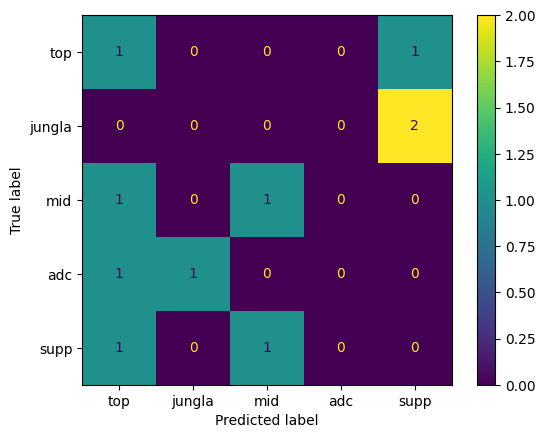

In [ ]:
y_test

array([4, 1, 0, 1, 3, 2, 3, 2, 4, 0])

In [ ]:
y_pred

array([3, 3, 2, 4, 3, 3, 3, 3, 3, 2])

In [ ]:
X_test

array([[[[0.03529412, 0.03529412, 0.04705882],
         [0.03529412, 0.03137255, 0.05098039],
         [0.03529412, 0.03137255, 0.05490196],
         ...,
         [0.14901961, 0.09411765, 0.09411765],
         [0.14117647, 0.09019608, 0.09019608],
         [0.14509804, 0.09411765, 0.09411765]],

        [[0.04313725, 0.04313725, 0.05490196],
         [0.04705882, 0.04313725, 0.0627451 ],
         [0.03529412, 0.03137255, 0.05882353],
         ...,
         [0.14901961, 0.09411765, 0.09411765],
         [0.14901961, 0.09411765, 0.09411765],
         [0.14901961, 0.09411765, 0.09411765]],

        [[0.05098039, 0.05098039, 0.0627451 ],
         [0.05490196, 0.05490196, 0.06666667],
         [0.03921569, 0.03529412, 0.05490196],
         ...,
         [0.14901961, 0.09803922, 0.09803922],
         [0.14509804, 0.09803922, 0.09411765],
         [0.14901961, 0.09803922, 0.09803922]],

        ...,

        [[0.04705882, 0.03921569, 0.02352941],
         [0.04705882, 0.04313725, 0.02745098]

In [ ]:
X_test[5]

array([[[0.03529412, 0.01568627, 0.02745098],
        [0.18823529, 0.15686275, 0.1254902 ],
        [0.43137255, 0.39215686, 0.32156863],
        ...,
        [0.1254902 , 0.18039216, 0.2       ],
        [0.11764706, 0.18039216, 0.19215686],
        [0.13333333, 0.19607843, 0.21176471]],

       [[0.06666667, 0.03529412, 0.04705882],
        [0.24313725, 0.2       , 0.16862745],
        [0.41176471, 0.37647059, 0.30588235],
        ...,
        [0.14117647, 0.2       , 0.21568627],
        [0.1254902 , 0.18431373, 0.2       ],
        [0.14117647, 0.2       , 0.21568627]],

       [[0.1372549 , 0.09803922, 0.10980392],
        [0.27843137, 0.22745098, 0.2       ],
        [0.37254902, 0.3254902 , 0.27058824],
        ...,
        [0.15294118, 0.21176471, 0.23137255],
        [0.12941176, 0.18823529, 0.20392157],
        [0.13333333, 0.19607843, 0.21176471]],

       ...,

       [[0.19215686, 0.36862745, 0.43921569],
        [0.18039216, 0.35686275, 0.41568627],
        [0.18039216, 0

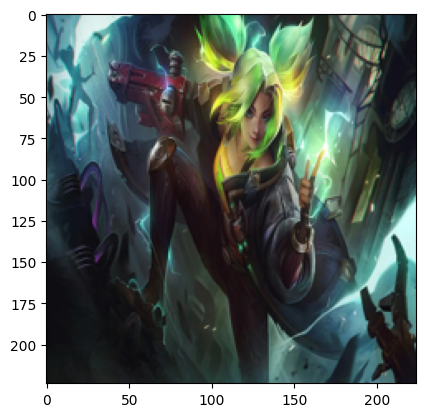

In [ ]:
import matplotlib.pyplot as plt
img_array = (X_test[4] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)

In [ ]:
# de aqui en adelante se veran las mejoras con un nuevo codigo

In [ ]:
# se busca como recomendacion la validacion cruzada la cual ayuda al data set si es pequeño por la cantidad de los datos

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

X = np.array(image_list)
y = np.array(y)
y_cat = tf.keras.utils.to_categorical(y, num_classes=5)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1s = []

fold = 1
for train_index, test_index in kf.split(X):
    print(f"\n🔁 Fold {fold}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index], y[test_index]  # not categorical for evaluation

    # Definir el modelo (puedes modificar aquí para usar CNN si quieres)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=20, verbose=0)

    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Evaluación
    acc = accuracy_score(y[test_index], y_pred)
    prec = precision_score(y[test_index], y_pred, average='weighted', zero_division=0)
    rec = recall_score(y[test_index], y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y[test_index], y_pred, average='weighted', zero_division=0)

    print(f"Accuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f} | F1: {f1:.2f}")

    # Guardar métricas
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    fold += 1

# Mostrar promedio final
print("\n📊 Promedio final de las métricas:")
print(f"Accuracy promedio: {np.mean(accuracies):.2f}")
print(f"Precision promedio: {np.mean(precisions):.2f}")
print(f"Recall promedio: {np.mean(recalls):.2f}")
print(f"F1-score promedio: {np.mean(f1s):.2f}")


🔁 Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Accuracy: 0.20 | Precision: 0.20 | Recall: 0.20 | F1: 0.20

🔁 Fold 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Accuracy: 0.30 | Precision: 0.12 | Recall: 0.30 | F1: 0.17

🔁 Fold 3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Accuracy: 0.40 | Precision: 0.20 | Recall: 0.40 | F1: 0.27

🔁 Fold 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Accuracy: 0.20 | Precision: 0.13 | Recall: 0.20 | F1: 0.15

🔁 Fold 5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Accuracy: 0.20 | Precision: 0.12 | Recall: 0.20 | F1: 0.13

📊 Promedio final de las métricas:
Accuracy promedio: 0.26
Precision promedio: 0.15
Recall promedio: 0.26
F1-score promedio: 0.18


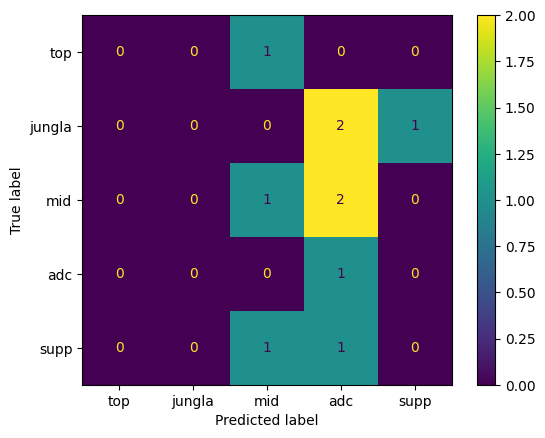

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['top','jungla','mid','adc','supp']
disp.plot()

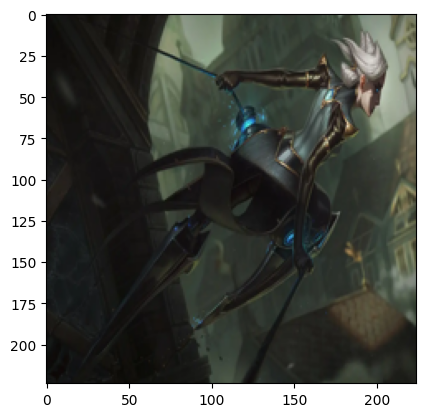

In [ ]:
import matplotlib.pyplot as plt
img_array = (X_test[0] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)